In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
from ML.Model import Predicter
from PreProcessing.DataManipulation import DataManipulation
import pickle

In [3]:
data = pd.read_csv("../data/deep-scenario.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Execution                      33530 non-null  int64  
 1   ScenarioID                     33530 non-null  object 
 2   Configuration_API_Description  33530 non-null  object 
 3   Attribute[TTC]                 33530 non-null  float64
 4   Attribute[DTO]                 33530 non-null  float64
 5   Attribute[Jerk]                33530 non-null  float64
 6   Attribute[COL]                 33530 non-null  bool   
 7   Attribute[COLT]                33530 non-null  object 
 8   Attribute[SAC]                 33530 non-null  float64
 9   reward                         33530 non-null  object 
 10  road                           33530 non-null  object 
 11  strategy                       33530 non-null  object 
 12  scenario                       33530 non-null 

## Pre Processing

In [4]:
dm = DataManipulation("../data/deep-scenario.csv")
dm.data.head(5)

,Execution,ScenarioID,Configuration_API_Description,Attribute[TTC],Attribute[DTO],Attribute[Jerk],Attribute[COL],Attribute[COLT],Attribute[SAC],reward,road,strategy,scenario
0,0,0_scenario_0,A red BoxTruck is overtaking (near) the ego ve...,100000.000000,24.810964,3.48,False,None,0.0,dto,road1,greedy,rain_day
1,0,0_scenario_1,A skyblue SUV is driving from the opposite dir...,100000.000000,8.654072,1.04,False,None,0.0,dto,road1,greedy,rain_day
2,0,0_scenario_2,A skyblue BoxTruck is driving ahead (near) of ...,2.103269,10.209357,4.98,False,None,0.0,dto,road1,greedy,rain_day
3,0,0_scenario_3,A black SchoolBus is driving ahead (near) of t...,7.452645,17.011425,2.42,False,None,0.0,dto,road1,greedy,rain_day
4,0,0_scenario_4,A red Hatchback is crossing the road (far) and...,2.885993,27.858975,2.84,False,None,0.0,dto,road1,greedy,rain_day


In [5]:
dm.addFromXML("../data/dataFromXML.csv")
dm.data.head(5)

,Execution,ScenarioID,Configuration_API_Description,Attribute[TTC],Attribute[DTO],Attribute[Jerk],Attribute[COL],Attribute[COLT],Attribute[SAC],reward,road,strategy,scenario,speed1,speed2,speed3,speed4,speed5,speed6
0,0,0_scenario_0,A red BoxTruck is overtaking (near) the ego ve...,100000.000000,24.810964,3.48,False,None,0.0,dto,road1,greedy,rain_day,0.250,0.049,1.932,3.753,5.989,7.349
1,0,0_scenario_1,A skyblue SUV is driving from the opposite dir...,100000.000000,8.654072,1.04,False,None,0.0,dto,road1,greedy,rain_day,8.287,8.410,8.767,8.871,8.998,9.143
2,0,0_scenario_2,A skyblue BoxTruck is driving ahead (near) of ...,2.103269,10.209357,4.98,False,None,0.0,dto,road1,greedy,rain_day,9.273,9.529,8.570,7.314,5.768,4.669
3,0,0_scenario_3,A black SchoolBus is driving ahead (near) of t...,7.452645,17.011425,2.42,False,None,0.0,dto,road1,greedy,rain_day,3.575,2.697,1.978,1.590,1.257,1.010
4,0,0_scenario_4,A red Hatchback is crossing the road (far) and...,2.885993,27.858975,2.84,False,None,0.0,dto,road1,greedy,rain_day,0.777,0.009,1.812,4.015,5.514,5.877


C:\Users\Yohannes\AppData\Local\Temp/ipykernel_14136/4175488753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dm.data.corr()["Attribute[COL]"].plot(kind="bar")


<AxesSubplot:>

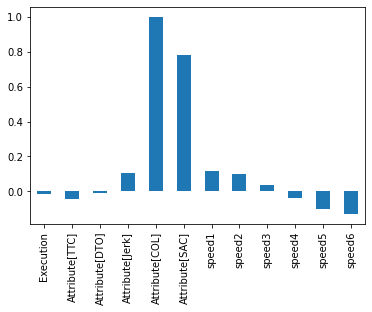

In [6]:
dm.data.corr()["Attribute[COL]"].plot(kind="bar")

In [7]:
dm.data.groupby(['strategy', 'Attribute[COL]']).size().unstack()

Attribute[COL],False,True
strategy,,
greedy,13070,192
random,13407,158
rl_based,6003,700


## Model

In [8]:
trainX, trainY, testX, testY = dm.splitTrainTest()
print(f"trainX:{trainX.shape}, trainY:{trainY.shape}, testX:{testX.shape}, testY:{testY.shape}")

splitting at 26824.
trainX:(26824, 13), trainY:(26824, 3), testX:(6706, 13), testY:(6706, 3)


In [9]:
trainX.head()

,Attribute[TTC],Attribute[DTO],Attribute[Jerk],reward,road,strategy,scenario,speed1,speed2,speed3,speed4,speed5,speed6
23853,100000.000000,6.434714,5.04,ttc,road2,random,rain_night,5.547,4.660,4.401,4.228,3.986,3.746
30032,0.695324,5.552715,5.74,jerk,road2,rl_based,sunny_night,5.558,4.607,4.358,4.832,4.246,3.967
11507,100000.000000,8.511993,5.90,ttc,road3,greedy,rain_night,0.908,0.001,0.789,0.687,0.001,1.000
17653,0.760641,7.845926,14.30,dto,road4,random,sunny_night,5.127,6.324,6.615,8.165,8.313,8.683
16680,8.738029,14.960495,0.88,dto,road3,random,sunny_night,8.075,8.280,8.360,8.458,8.566,8.755


In [10]:
model = Predicter()
x, y = model.preProcess(trainX, trainY) # some last preprocessing (scaling and label encoding)
testX, testY = model.preProcess(testX, testY)

model.fit(x, y)

In [11]:
pred = model.predict(testX)
score = model.getScore(pred, testY)

Total: 6706, number of collisions: 215
	TN: 6467 	| FP: 24 
	FN: 98 	| TP: 117
Accuracy: 0.98
Precision: 0.83
Recall: 0.54
F1: 0.66


In [12]:
model.saveModel("MLPClassifier")

Model saved!


## Paramter Tuning

https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

In [31]:
curr_params = model.model.get_params()

# loop through all the parameters and change each value to a list of the value
curr_params = dict((key, [value]) for (key, value) in curr_params.items())
curr_params

{'activation': ['relu'],
 'alpha': [0.0001],
 'batch_size': ['auto'],
 'beta_1': [0.9],
 'beta_2': [0.999],
 'early_stopping': [False],
 'epsilon': [1e-08],
 'hidden_layer_sizes': [(100,)],
 'learning_rate': ['constant'],
 'learning_rate_init': [0.001],
 'max_fun': [15000],
 'max_iter': [200],
 'momentum': [0.9],
 'n_iter_no_change': [10],
 'nesterovs_momentum': [True],
 'power_t': [0.5],
 'random_state': [None],
 'shuffle': [True],
 'solver': ['adam'],
 'tol': [0.0001],
 'validation_fraction': [0.1],
 'verbose': [False],
 'warm_start': [False]}

In [32]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model.model, curr_params, n_jobs=-1, cv=5)
clf.fit(x, y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'batch_size': ['auto'], 'beta_1': [0.9],
                         'beta_2': [0.999], 'early_stopping': [False],
                         'epsilon': [1e-08], 'hidden_layer_sizes': [(100,)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_fun': [15000],
                         'max_iter': [200], 'momentum': [0.9],
                         'n_iter_no_change': [10], 'nesterovs_momentum': [True],
                         'power_t': [0.5], 'random_state': [None],
                         'shuffle': [True], 'solver': ['adam'], 'tol': [0.0001],
                         'validation_fraction': [0.1], 'verbose': [False],
                         'warm_start': [False]})

In [33]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [34]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.984 (+/-0.002) for {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [35]:
y_true, y_pred = testY, clf.predict(testX)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6491
           1       0.82      0.54      0.66       215

    accuracy                           0.98      6706
   macro avg       0.90      0.77      0.82      6706
weighted avg       0.98      0.98      0.98      6706



In [36]:
score = clf.score(testX, testY)
score

0.9816582165225172

Need to analyse, best params and default params are the same, why?